In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

import os
import sys 

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb



In [29]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath('EDA.ipynb'))

# Determine the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the parent directory to the Python path
sys.path.append(parent_dir)
from src.utils import cross_validate_model, plot_feature_importances

ImportError: cannot import name 'plot_feature_importances' from 'src.utils' (c:\my-drive\ML-projects\kaggle_academics\src\utils.py)

### 1. EDA

In [ ]:
#loading and read the data 
training_data_file = '../data/raw/train.csv'
test_data_file = '../data/raw/test.csv'
df = pd.read_csv(training_data_file)
test = pd.read_csv(test_data_file)
df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
df.shape

(76518, 38)

In [ ]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [ ]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


In [ ]:
#correct column names
df=df.rename(columns={'Nacionality':'Nationality'})
test=test.rename(columns={'Nacionality':'Nationality'})

In [ ]:
# Define the threshold for unique values to consider a column as categorical
threshold = 8

# Initialize lists to hold categorical and numerical columns
cat_cols = []
num_cols = []

# Iterate over the columns and categorize based on the unique values
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values <= threshold:
        cat_cols.append(col)
    else:
        num_cols.append(col)

# Display the results
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: ['Marital status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']
Numerical columns: ['id', 'Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nationality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemploymen

Take a look at target distribution

C:\Users\pvdng\AppData\Local\Temp\ipykernel_31136\1275180485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Target', data=df, palette='viridis')


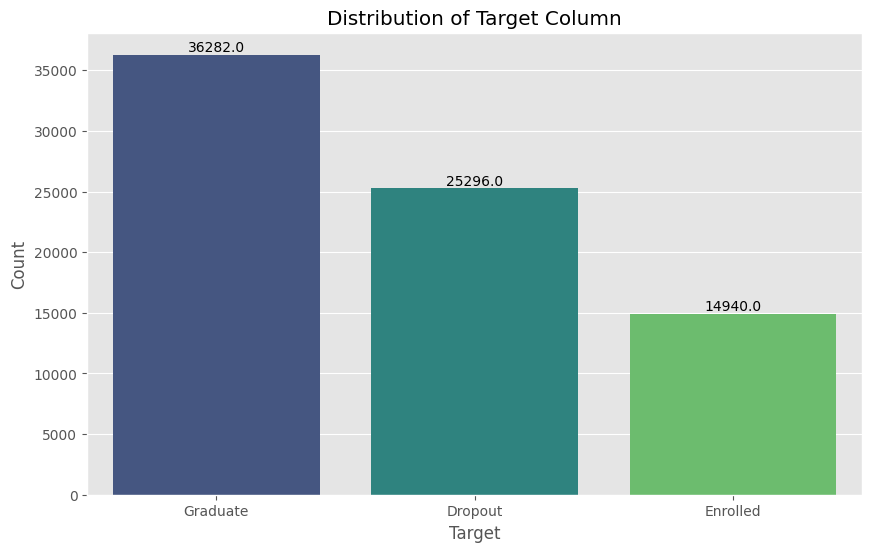

In [ ]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Target', data=df, palette='viridis')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Distribution of Target Column')
plt.xlabel('Target')
plt.ylabel('Count')

# Show the plot
plt.show()


Plot the categorical columns distribution 

C:\Users\pvdng\AppData\Local\Temp\ipykernel_31136\3809262953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette='pastel')
C:\Users\pvdng\AppData\Local\Temp\ipykernel_31136\3809262953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette='pastel')
C:\Users\pvdng\AppData\Local\Temp\ipykernel_31136\3809262953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette='pastel')
C:\Users\pvdng\AppData\Local\Temp\ipykernel_31136\3809262953.py:8: FutureWarning: 

Pass

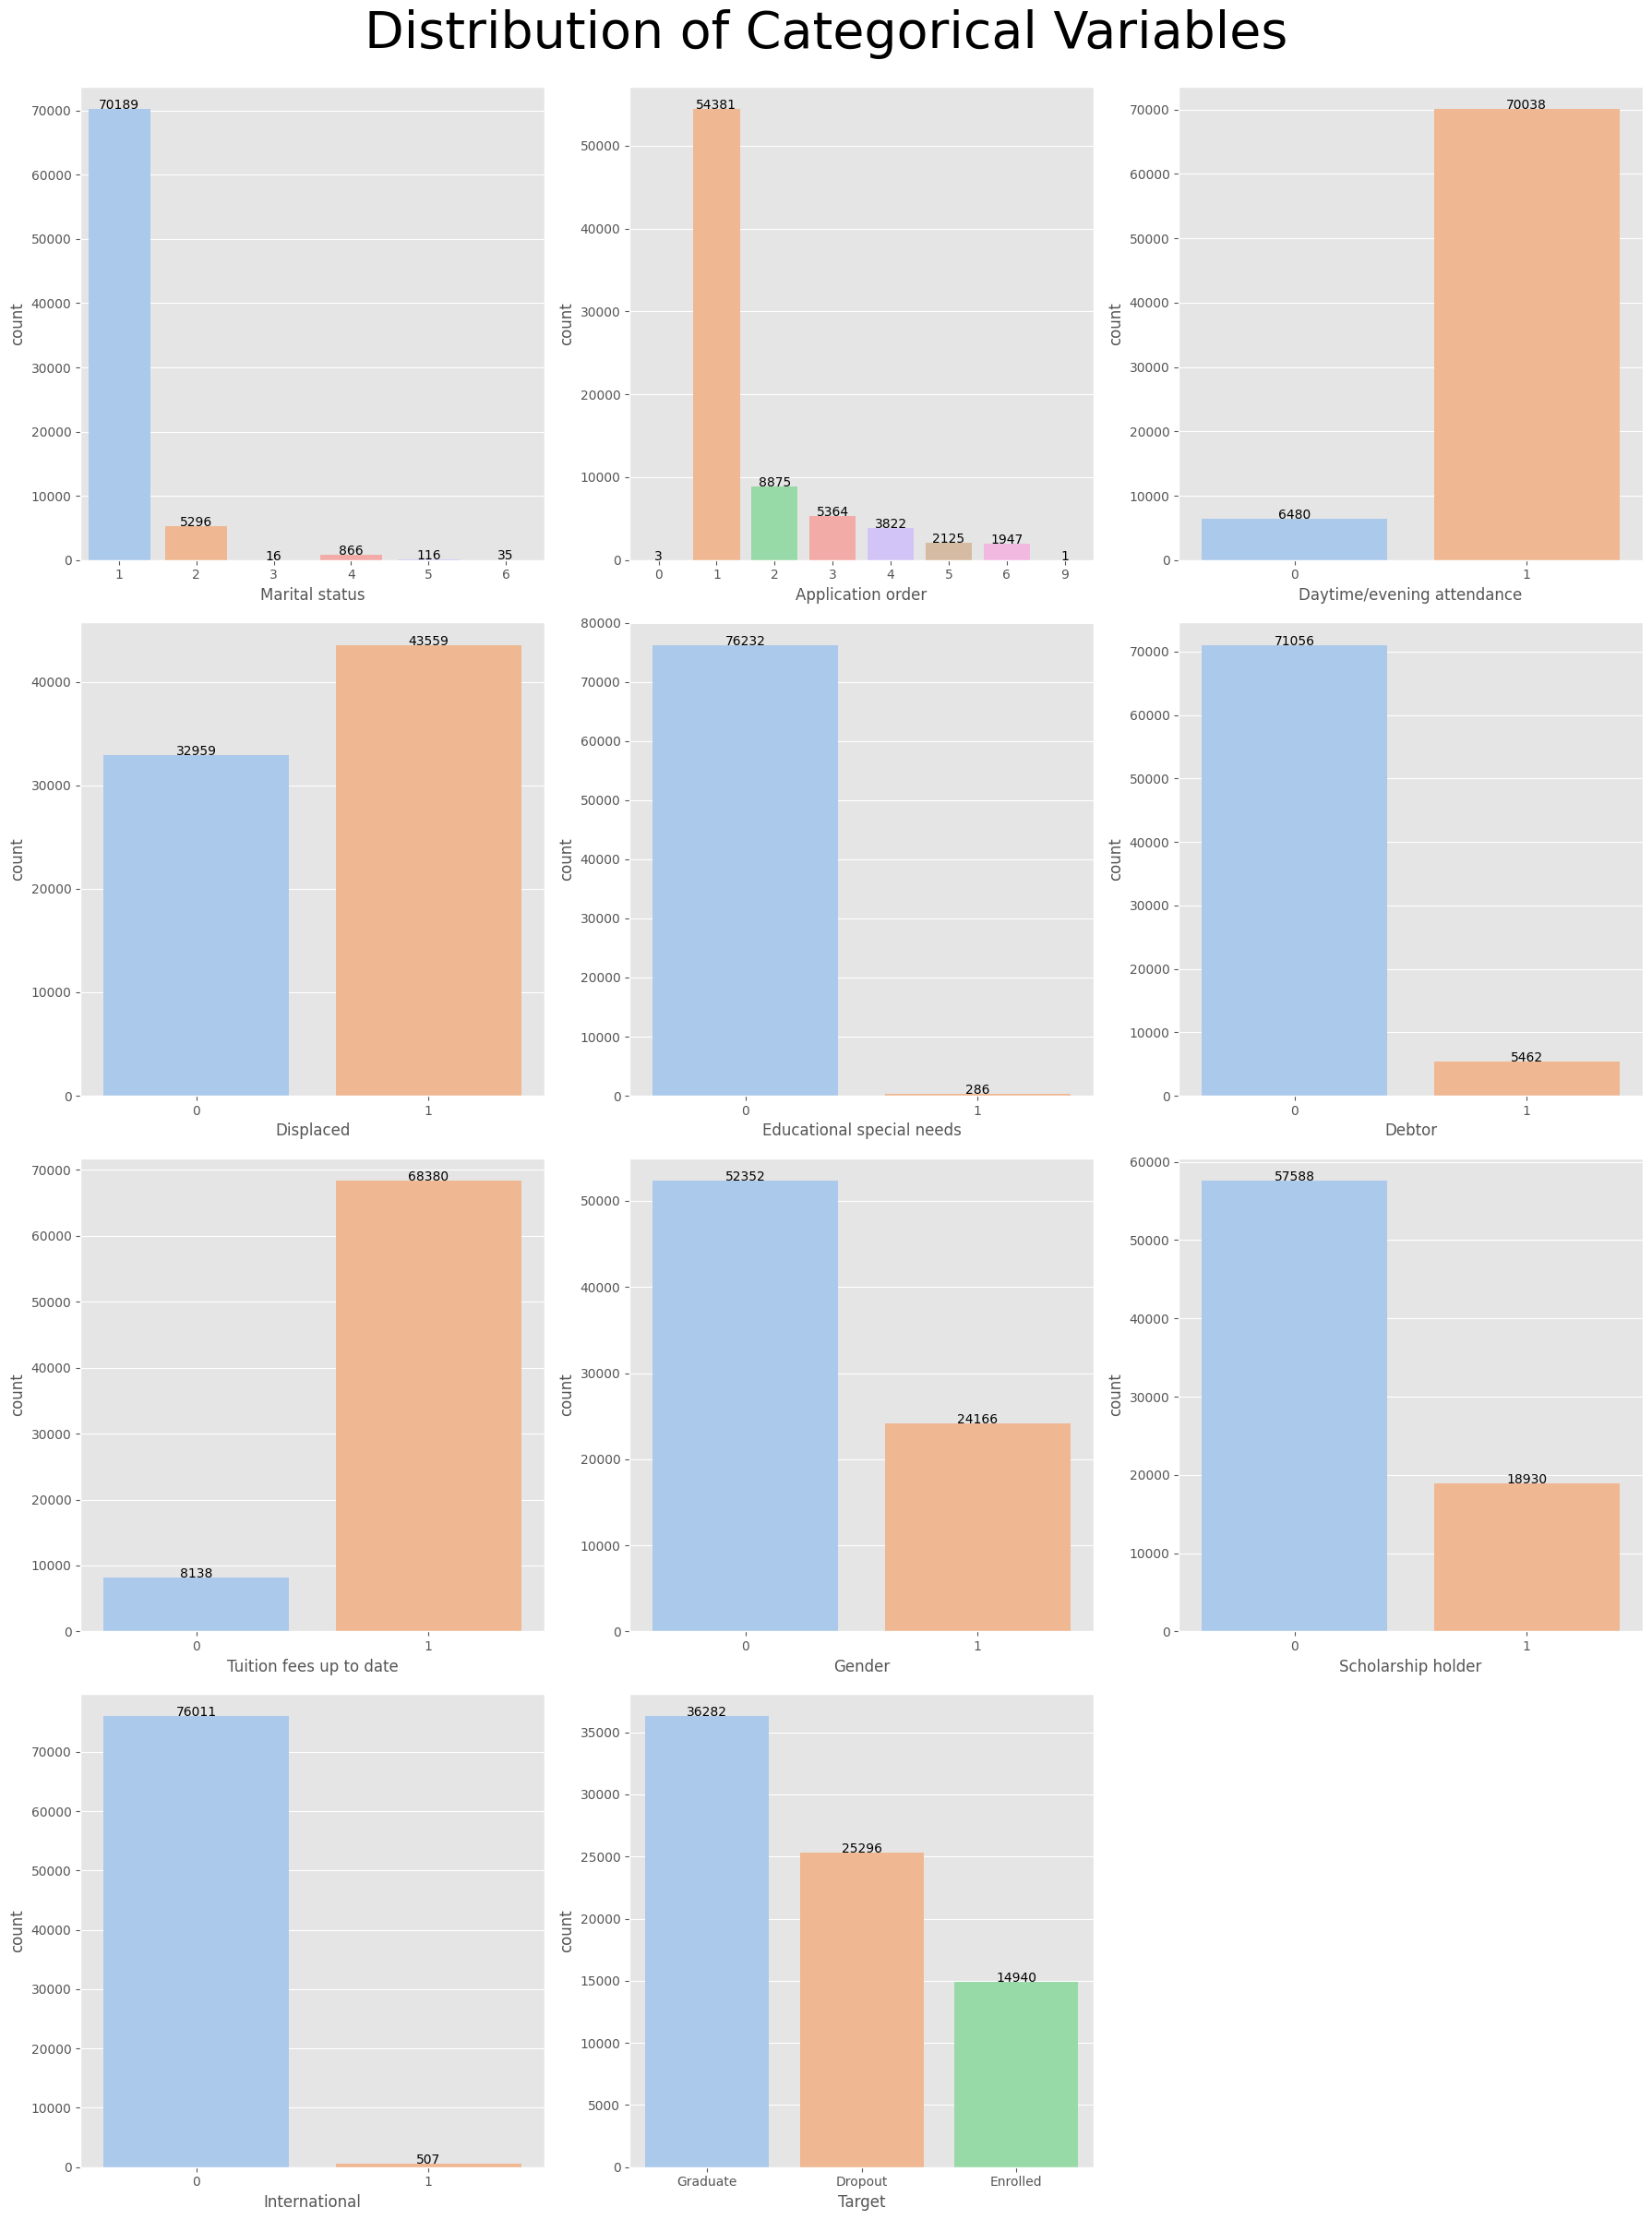

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(18, 24))
plotnumber = 1

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=df[col], data=df, palette='pastel')
        
        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")
        
        plt.xlabel(col)
        # plt.xticks(rotation=45)
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

plot the distribution of categorical columns by Target 

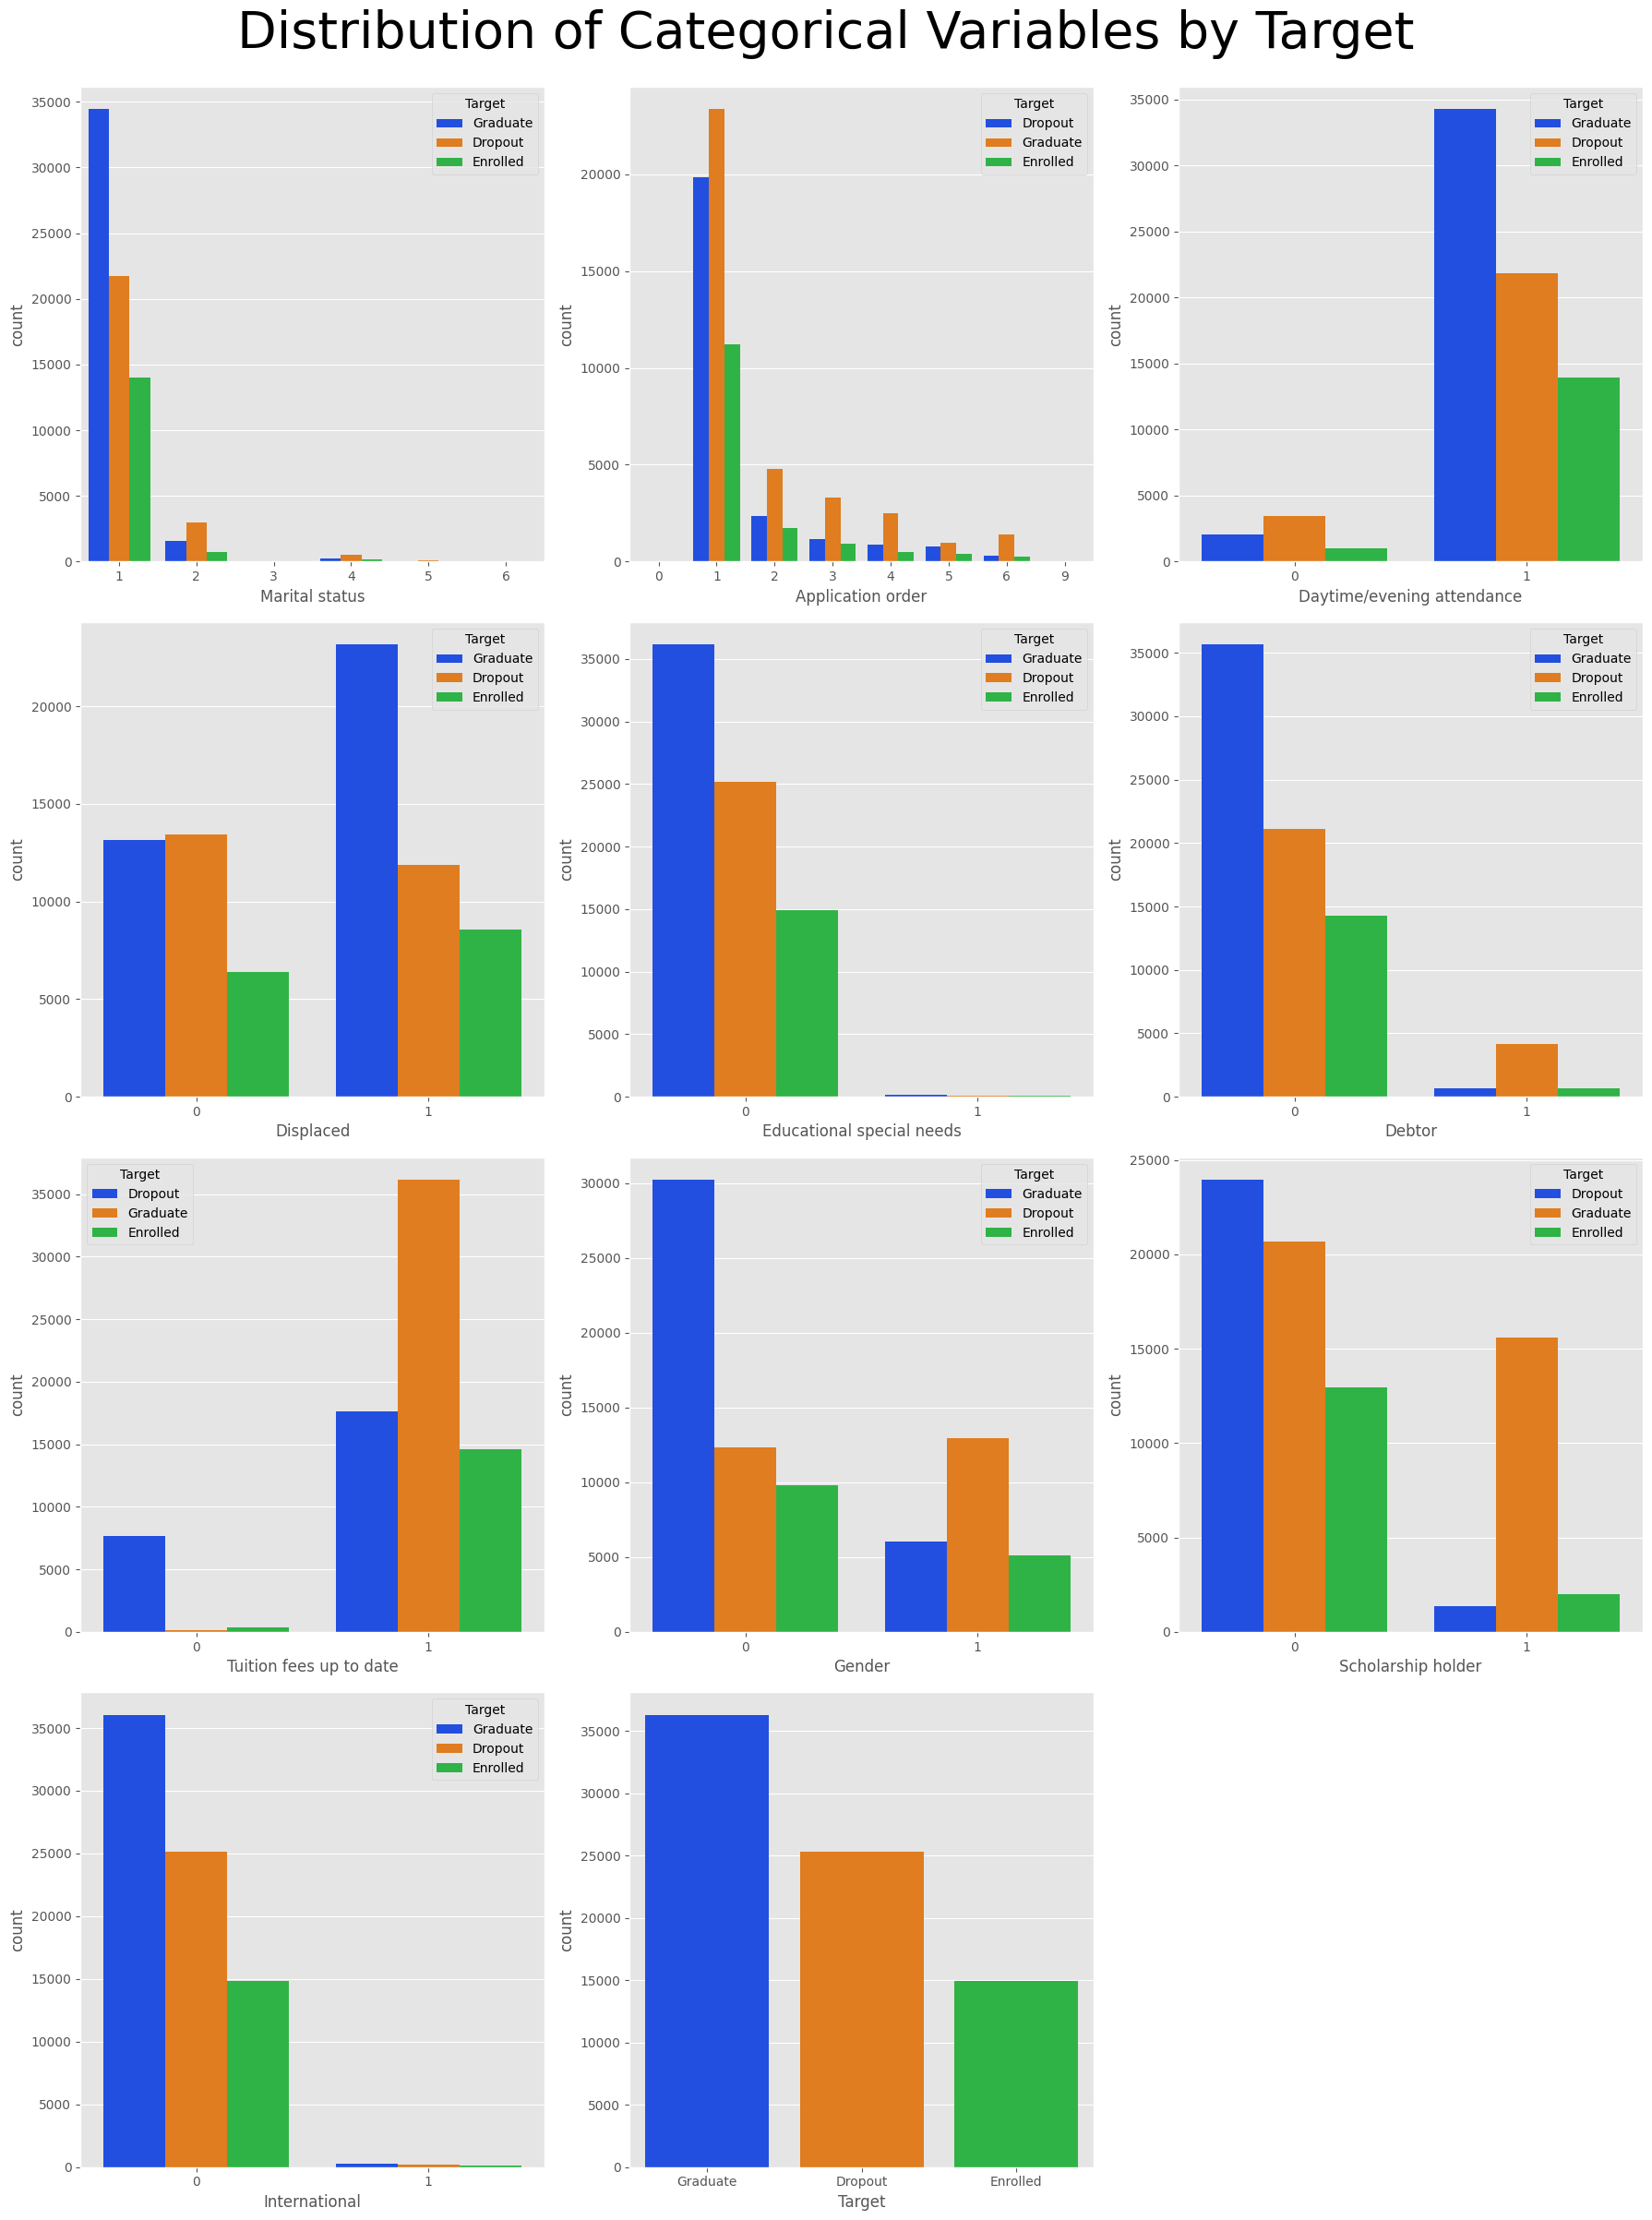

In [ ]:
plt.figure(figsize=(18, 24))
plotnumber = 1

# Loop through each column
for col in cat_cols:
    if plotnumber <= len(cat_cols):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x=df[col], hue=df['Target'], palette='bright')
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Target', fontsize=40, y=1)
plt.tight_layout()
plt.show()

In [ ]:
df[['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']]

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


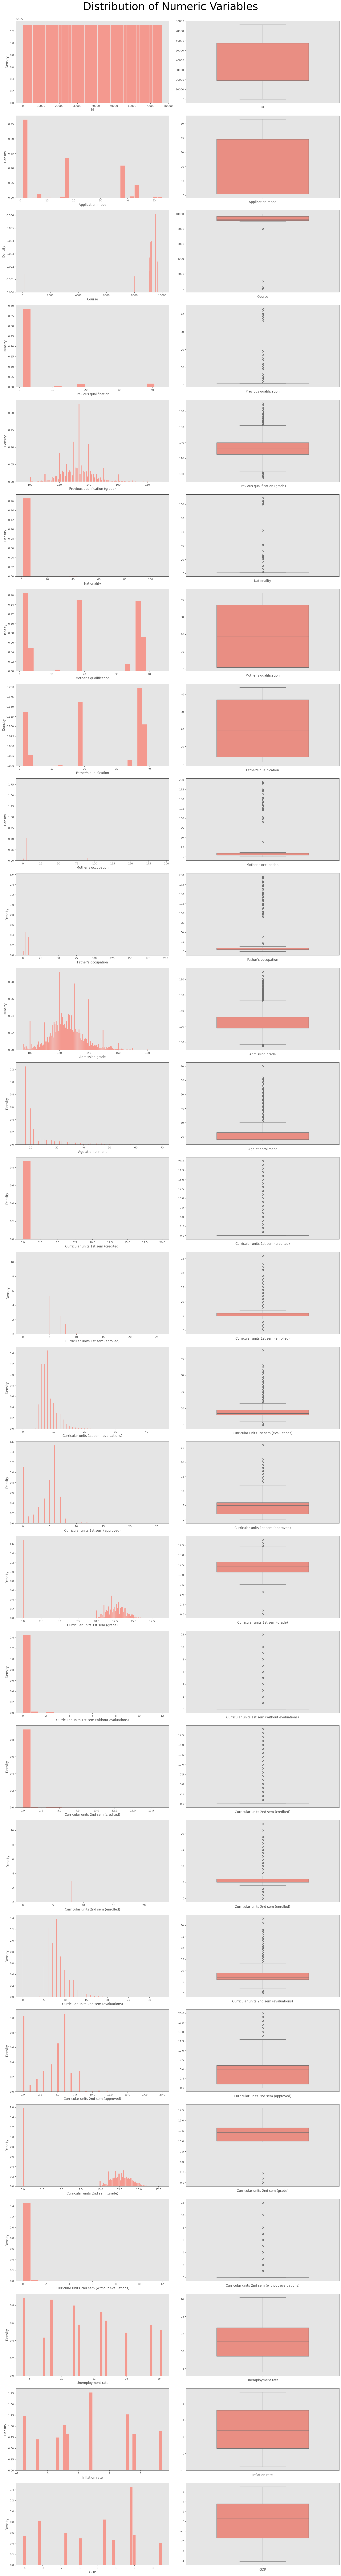

In [ ]:
plt.figure(figsize=(18, 135))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        
        ax1 = plt.subplot(len(num_cols), 2, 2 * plotnumber - 1)
        sns.histplot(df[col], color='salmon', fill=True, stat="density")
        for spine in ax1.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax1.set_xlabel(col)
        ax1.grid(False)
        
        ax2 = plt.subplot(len(num_cols), 2, 2 * plotnumber)
        sns.boxplot(y=df[col], color='salmon', width=0.6, linewidth=1)
        for spine in ax2.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax2.set_xlabel(col)
        ax2.set_ylabel('')
        ax2.grid(False)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

### correlation matrix


* before we can plot correlation matrix with all columns, we are going to lable target column


In [ ]:
from sklearn.preprocessing import LabelEncoder

categories = ['dropout', 'enrolled', 'graduate']
label_encoder = LabelEncoder()

# Convert categorical 'Target' labels to numeric values using LabelEncoder
df['Target'] = label_encoder.fit_transform(df['Target'])

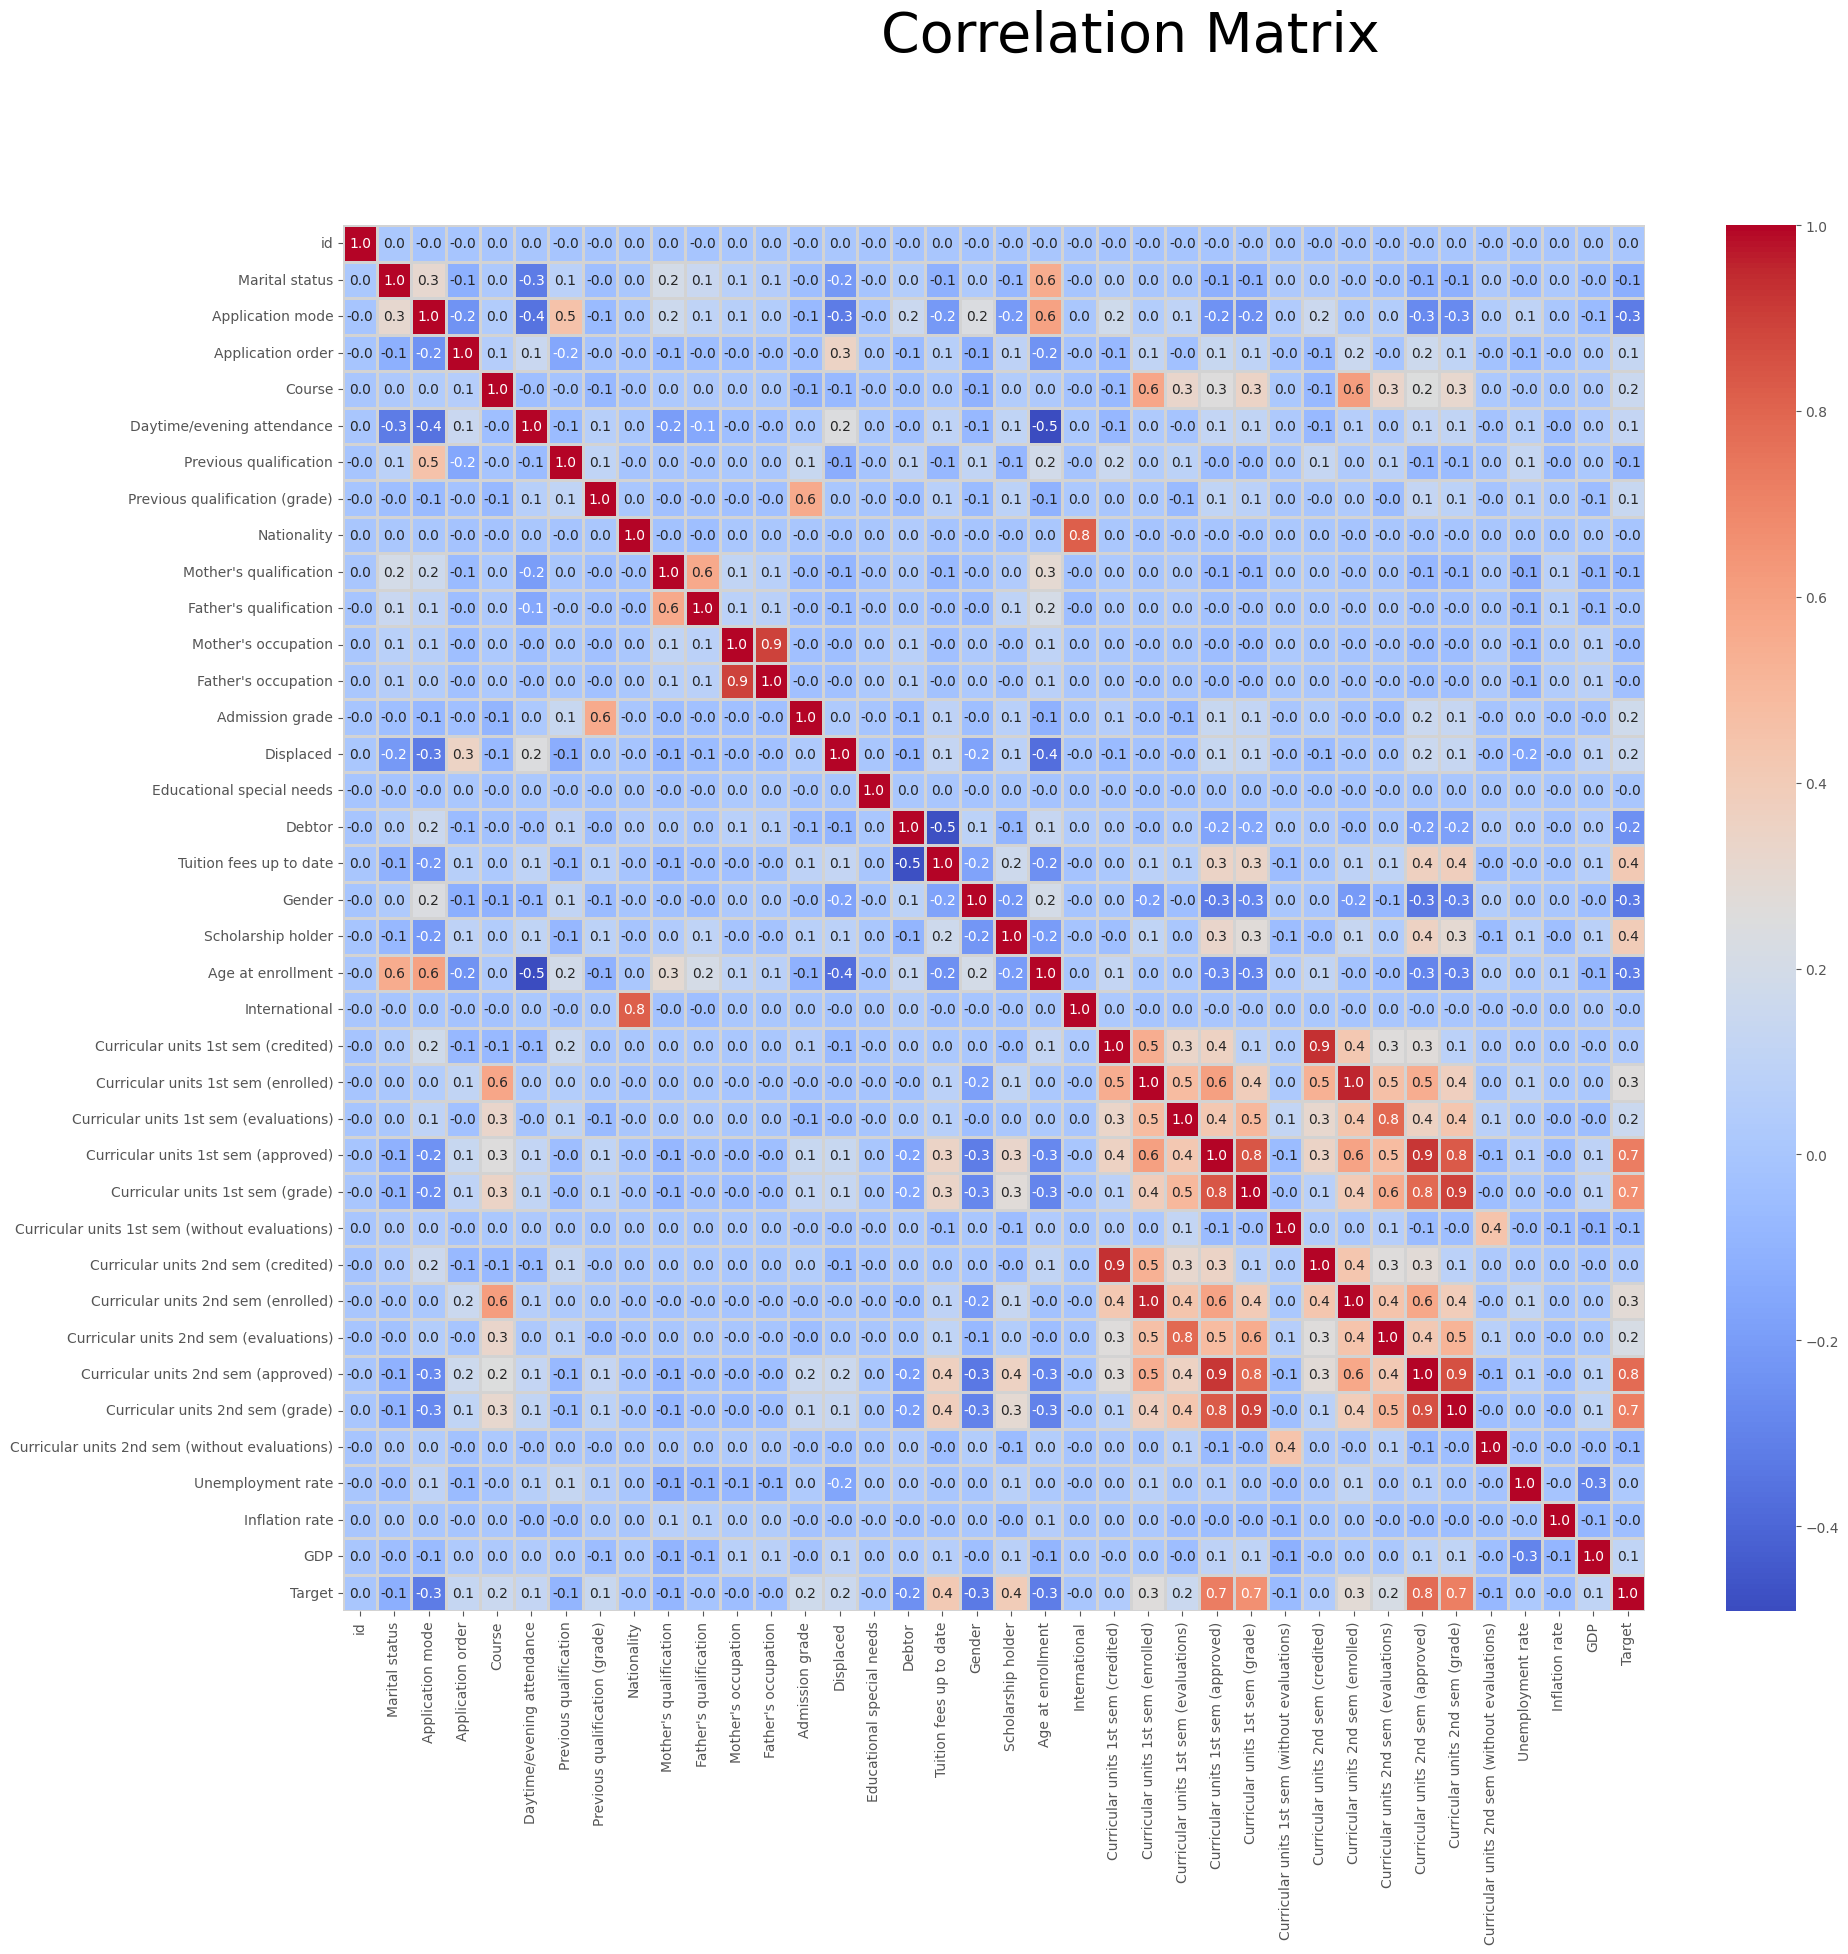

In [ ]:
# Correlation matrix
plt.figure(figsize=(21, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

### 2. Remove outlier (to be added)

### 3. features selection/engineering (to be added)


### 4. Model training 

In [ ]:
initial_features = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

# Split the features and target variable
X_train = df[initial_features]
y_train = df['Target']
X_test = test[initial_features]

In [ ]:
models= {
        "Logistic": LogisticRegression,
        "Random Forest": RandomForestClassifier,
        "AdaBoost": AdaBoostClassifier,
        "GradientBoosting": GradientBoostingClassifier,
        "XGBoost": xgb.XGBClassifier
            }
h_params={
        "Random Forest":{
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300]
                },
                
        "XGBoost":{
                #'learning_rate':[.1,.01,.05,.001],
                'n_estimators': [8,16,32,64,128,256]
                },
        "GradientBoosting":{
                'learning_rate': 0.1,
                'n_estimators': 100,
                'max_depth': 3,
                'min_samples_split': 2,
                'min_samples_leaf': 1,
                'subsample': 1,
                'random_state': 42,
                'ccp_alpha': 0.0001
                },
        "Logistic":{
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter': [100, 200, 300, 400, 500],
                'l1_ratio': [0, 0.1, 0.5, 0.7, 1],  # Only used if penalty='elasticnet'
                'class_weight': [None, 'balanced']
                }
            }

In [ ]:
model_names = []
acc =[]
for model_name, model in models.items():
    print(f"Training {model_name}...")
    clf, mean_accuracy_score = cross_validate_model(model, X_train, y_train)
    print(f'{model_name} Results: {mean_accuracy_score}\n')
    model_names.append(model_name)
    acc.append(mean_accuracy_score)
    
    
    

Training Logistic...


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 0, Train Accuracy: 0.73282, Val Accuracy: 0.73144
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 1, Train Accuracy: 0.74367, Val Accuracy: 0.73830
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 2, Train Accuracy: 0.75210, Val Accuracy: 0.75431
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 3, Train Accuracy: 0.73232, Val Accuracy: 0.73685
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 4, Train Accuracy: 0.74428, Val Accuracy: 0.74724
--------------------------------------------------
Average Validation Accuracy: 0.7416294313654901
Logistic Results: 0.7416294313654901

Training Random Forest...
Fold: 0, Train Accuracy: 0.99998, Val Accuracy: 0.82456
--------------------------------------------------
Fold: 1, Train Accuracy: 0.99998, Val Accuracy: 0.82050
--------------------------------------------------
Fold: 2, Train Accuracy: 0.99998, Val Accuracy: 0.82808
--------------------------------------------------
Fold: 3, Train Accuracy: 0.99995, Val Accuracy: 0.83134
--------------------------------------------------
Fold: 4, Train Accuracy: 0.99997, Val Accuracy: 0.82513
--------------------------------------------------
Average Validation Accuracy: 0.8259233726161407
Random Forest Results: 0.8259233726161407

Training AdaBoost...


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold: 0, Train Accuracy: 0.81971, Val Accuracy: 0.81606
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold: 1, Train Accuracy: 0.81958, Val Accuracy: 0.81613
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold: 2, Train Accuracy: 0.81870, Val Accuracy: 0.81946
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold: 3, Train Accuracy: 0.81839, Val Accuracy: 0.82291
--------------------------------------------------


c:\Users\pvdng\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-academics-liJTA0Xu-py3.11\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold: 4, Train Accuracy: 0.81887, Val Accuracy: 0.81932
--------------------------------------------------
Average Validation Accuracy: 0.8187747285286762
AdaBoost Results: 0.8187747285286762

Training GradientBoosting...
Fold: 0, Train Accuracy: 0.83104, Val Accuracy: 0.82488
--------------------------------------------------
Fold: 1, Train Accuracy: 0.83229, Val Accuracy: 0.82351
--------------------------------------------------
Fold: 2, Train Accuracy: 0.83074, Val Accuracy: 0.82821
--------------------------------------------------


KeyboardInterrupt: 

model scores

In [ ]:

accuracy = pd.DataFrame({
    'Model': model_names,
    'Score': acc
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted


AttributeError: 'list' object has no attribute 'sort_values'

### feature importance 

In [ ]:
# Feature importance in GBM
model_name = 'Gradient Boosting'
fig = plot_feature_importances(gb_model, model_name, 'HSV', X_train)
fig


NameError: name 'gb_model' is not defined